# Reservamos data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting options to see all columns in df
pd.set_option('display.max_columns', None)

In [4]:
# Reading reservamos_purchase_complete.csv and reservamos_purchase_attempt.csv
reservamos_purchase_complete_df = pd.read_csv('./csv_data/reservamos_purchase_complete.csv')
reservamos_purchase_attemp_df = pd.read_csv('./csv_data/reservamos_purchase_attempt.csv')

/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_36028/287770312.py:2: DtypeWarning: Columns (41,69,70,75) have mixed types. Specify dtype option on import or set low_memory=False.
  reservamos_purchase_complete_df = pd.read_csv('./csv_data/reservamos_purchase_complete.csv')
/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_36028/287770312.py:3: DtypeWarning: Columns (22,82,90,92,93,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  reservamos_purchase_attemp_df = pd.read_csv('./csv_data/reservamos_purchase_attempt.csv')


In [5]:
# Replace spaces with underscores in columns names
reservamos_purchase_attemp_df.columns  = [columns.replace(" ", "_") for columns in reservamos_purchase_attemp_df.columns]
reservamos_purchase_complete_df.columns  = [columns.replace(" ", "_") for columns in reservamos_purchase_complete_df.columns]
# Define palette colors for plots
palette_colors = [ '#49b4df', '#76bb20', '#062a74', '#e3048d']

In [92]:
# plot functions
def plot_data_with_mplt(data: pd.Series, title: str, xlabel:str, ylabel:str, color: str, kind = "bar", show_amount = False, grid_axis = 'x'):
    plt.figure(figsize=(14, 10))
    ax = data.plot(kind=kind, title=title, color=color)
    ax.grid(axis=grid_axis)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax.grid(axis=grid_axis)
    if show_amount:
        for i in ax.patches:
            ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, f"{int(i.get_width()):,}",
                    va='center')
    plt.show()

def plot_data_with_sns(data: pd.Series, title: str, xlabel:str, ylabel:str, color: str, show_amount = False, grid_axis = 'x', orientation = 'v'):
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(x=data.index, y=data.values, color=color)
    ax.grid(axis=grid_axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if show_amount and orientation == 'v': 
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height()):,}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points') 
        ax.set_ylim(0, segment_distribution.max() * 1.2)

            

    else:
        for p in ax.patches:
            width = p.get_width()
            plt.text(width + 1,  
                    p.get_y() + p.get_height() / 2, 
                    f'{int(width):,}', 
                    va='center')
            ax.set_ylim(0, product.max() * 1.2)

    plt.show()

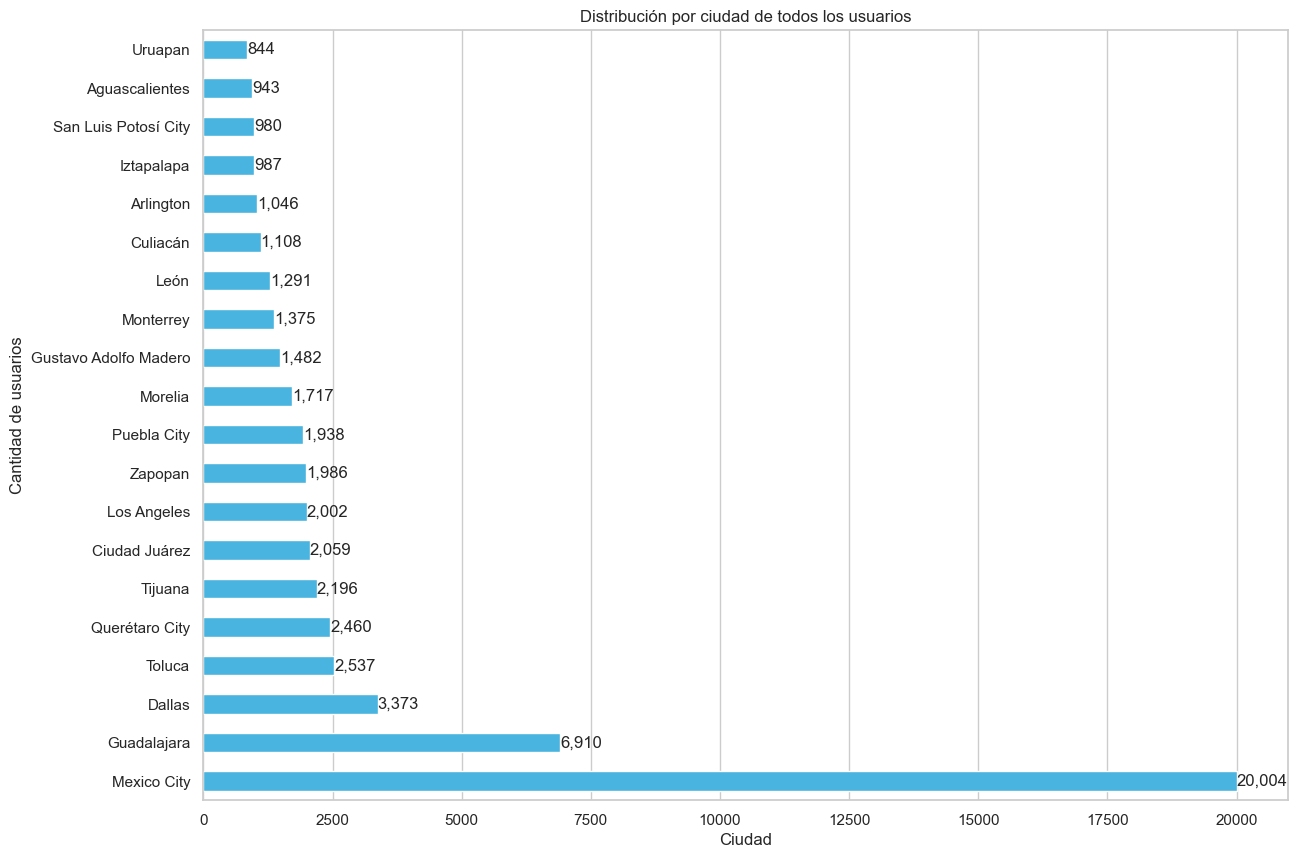

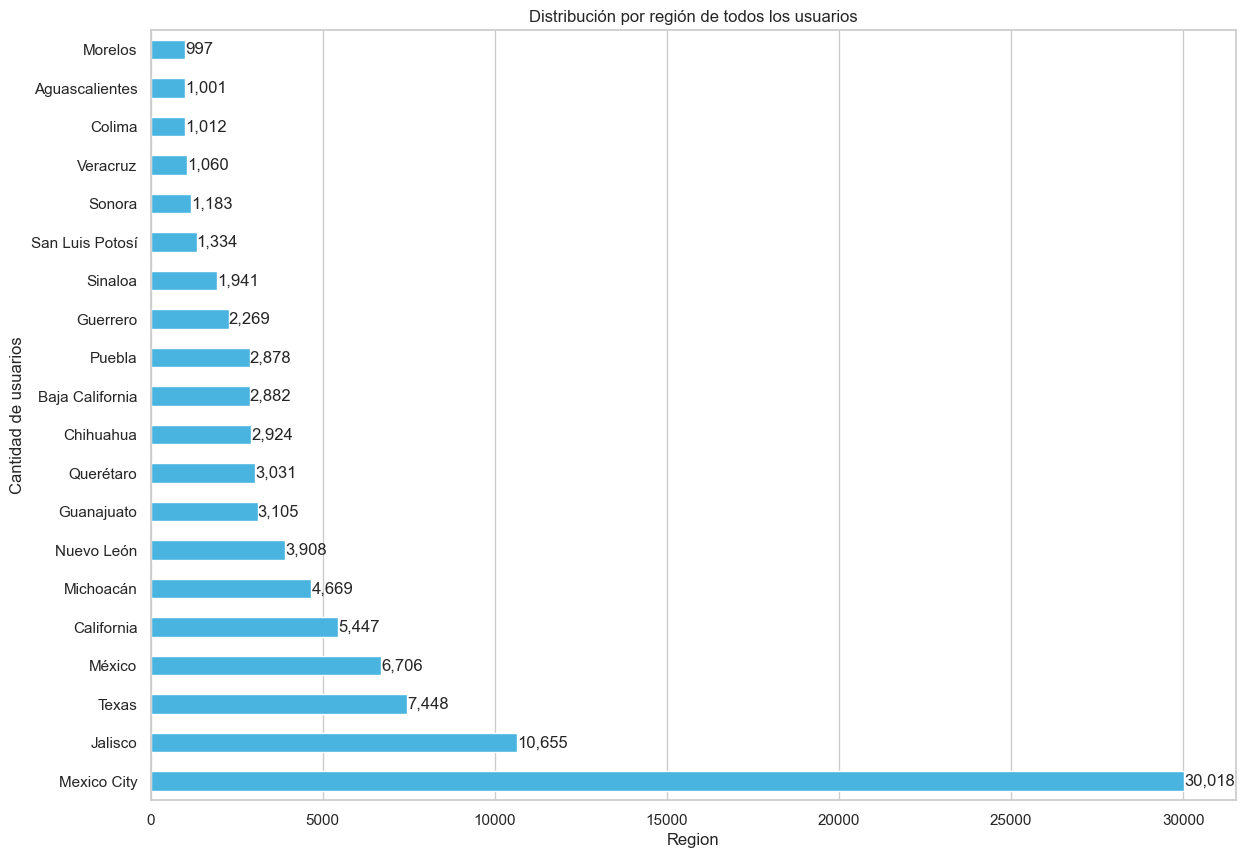

In [50]:
# Distribution of users by city and region
# Drop duplicates to get the last city and region of each user (i don't know how the city and region are updated so i decide to keep the last one)
attempt_city_region_reservamos = reservamos_purchase_attemp_df[["User_Fingerprint", "$city", "$region"]].drop_duplicates(subset=["User_Fingerprint"], keep="last")
complete_city_region_reservamos = reservamos_purchase_complete_df[["User_Fingerprint", "$city", "$region"]].drop_duplicates(subset=["User_Fingerprint"], keep="last")

# Concatenate both dataframes attempt and complete to get all users
region_city_all_users = pd.concat([attempt_city_region_reservamos, complete_city_region_reservamos], axis=0)
region_city_all_users = region_city_all_users.drop_duplicates(subset=["User_Fingerprint"], keep="last")

# Getting the top 20 cities and regions
city = region_city_all_users["$city"].value_counts().head(20)
region = region_city_all_users["$region"].value_counts().head(20)




plot_data_with_mplt(city, 'Distribución por ciudad de todos los usuarios', 'Ciudad', 'Cantidad de usuarios', '#49b4df', show_amount=True, kind="barh", grid_axis='y')
plot_data_with_mplt(region, 'Distribución por región de todos los usuarios', 'Region', 'Cantidad de usuarios', '#49b4df', show_amount=True, kind="barh", grid_axis='y')


/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_36028/4284529142.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index, y=data.values, palette=palette_colors)


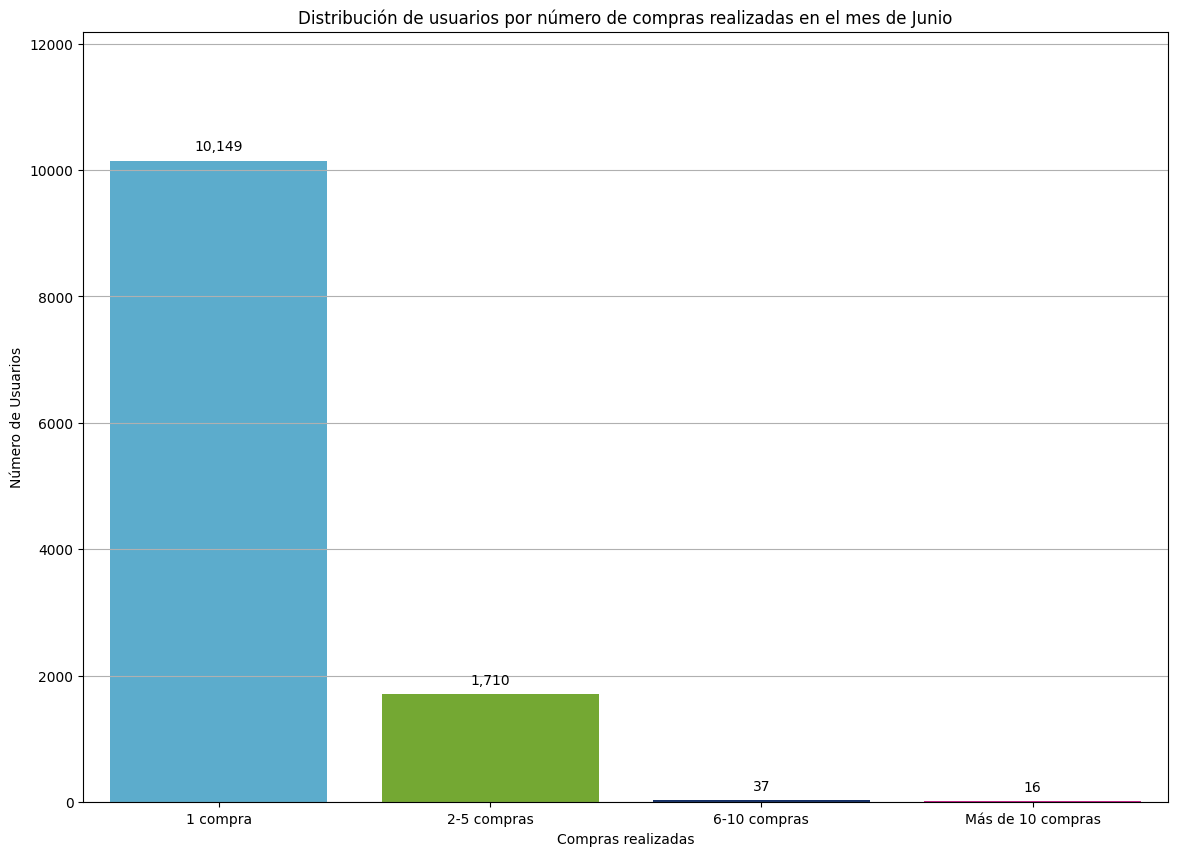

In [19]:
#Frecuency of users by number of purchases completed
frecuency_per_user = reservamos_purchase_complete_df["User_Fingerprint"].value_counts()

segments = pd.cut(frecuency_per_user, bins=[0, 1, 5, 10, float('inf')],
                  labels=['1 compra', '2-5 compras', '6-10 compras', 'Más de 10 compras'])

segment_distribution = segments.value_counts()


plot_data_with_sns(segment_distribution, 'Distribución de usuarios por número de compras realizadas en el mes de Junio', 'Compras realizadas', 'Número de Usuarios', '#49b4df', show_amount=True)


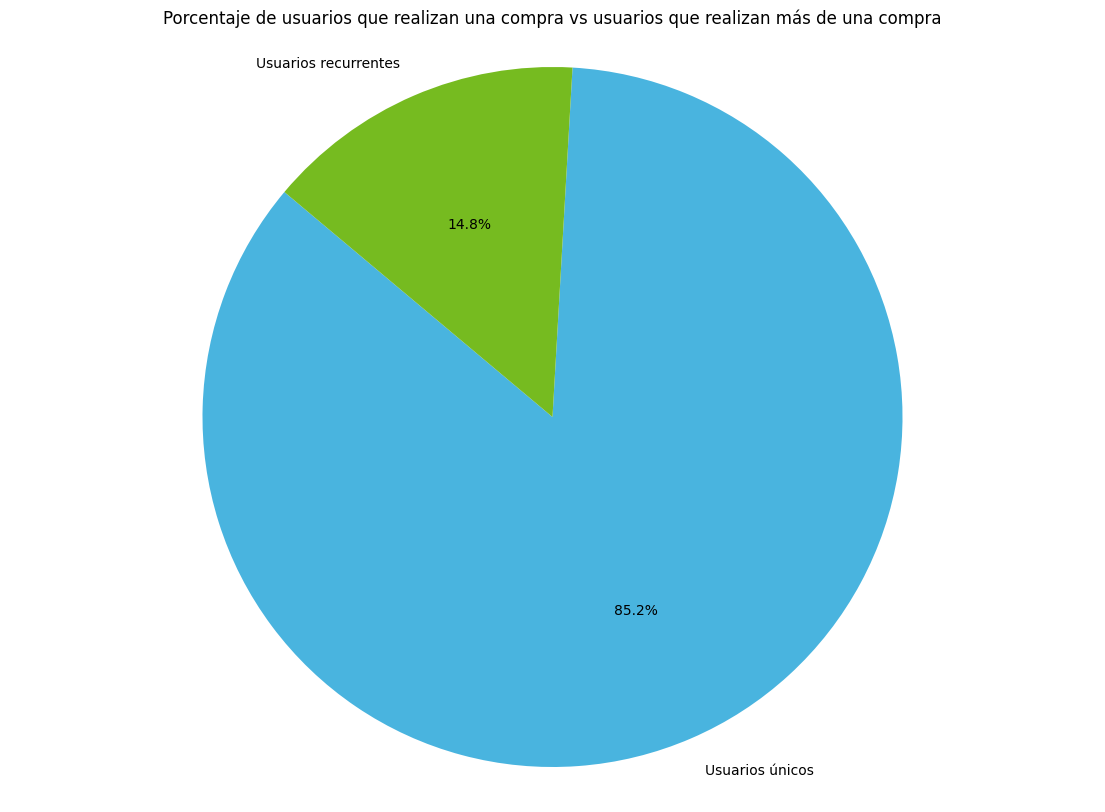

In [20]:
# Recurrent users vs unique users
unique_users = reservamos_purchase_complete_df.groupby('User_Fingerprint').count()
unique_users["event"] = unique_users["event"].apply(lambda x : "recurring_user" if x > 1  else "unique_user")
user_counts = unique_users["event"].value_counts()

plt.figure(figsize=(14, 10))
plt.pie(user_counts, labels=["Usuarios únicos", "Usuarios recurrentes"], autopct='%1.1f%%', startangle=140, colors=palette_colors)
plt.title('Porcentaje de usuarios que realizan una compra vs usuarios que realizan más de una compra')
plt.axis('equal') 
plt.show()

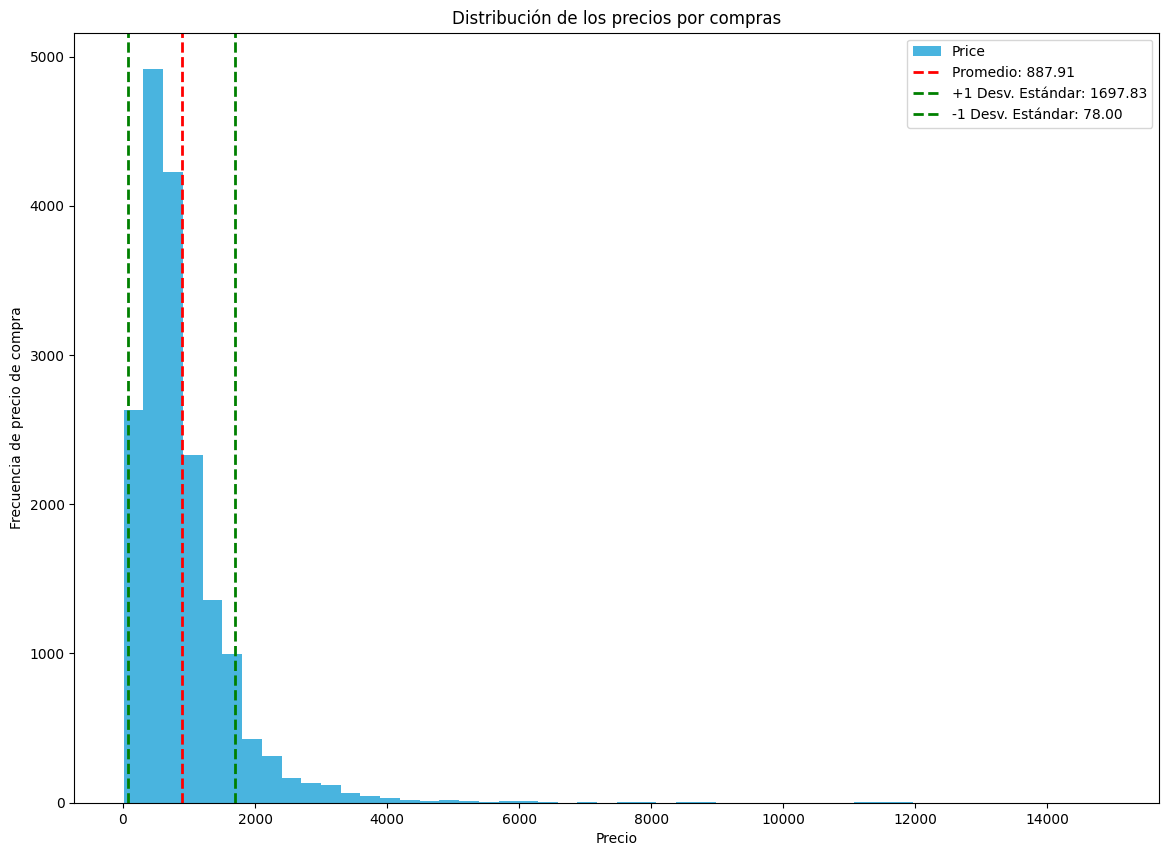

In [22]:
# Distribution of prices by purchases 
reservamos_purchase_complete_df['Price'] = pd.to_numeric(reservamos_purchase_complete_df['Departure_Price'], errors='coerce')
mean_price = reservamos_purchase_complete_df['Price'].mean()
std_price = reservamos_purchase_complete_df['Price'].std()

plt.figure(figsize=(14, 10))
reservamos_purchase_complete_df['Price'].plot(kind='hist', bins=50, color='#49b4df')
plt.title('Distribución de los precios por compras')
plt.xlabel('Precio')
plt.ylabel('Frecuencia de compra')

plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {mean_price:.2f}')
plt.axvline(mean_price + std_price, color='green', linestyle='dashed', linewidth=2, label=f'+1 Desv. Estándar: {mean_price + std_price:.2f}')
plt.axvline(mean_price - std_price, color='green', linestyle='dashed', linewidth=2, label=f'-1 Desv. Estándar: {mean_price - std_price:.2f}')

plt.title('Distribución de los precios por compras')
plt.xlabel('Precio')
plt.ylabel('Frecuencia de precio de compra')
plt.legend()
plt.show()

In [31]:
#convert timemestamp unix to datetime
reservamos_purchase_complete_df['time'] = pd.to_datetime(reservamos_purchase_complete_df['time'], unit='s')


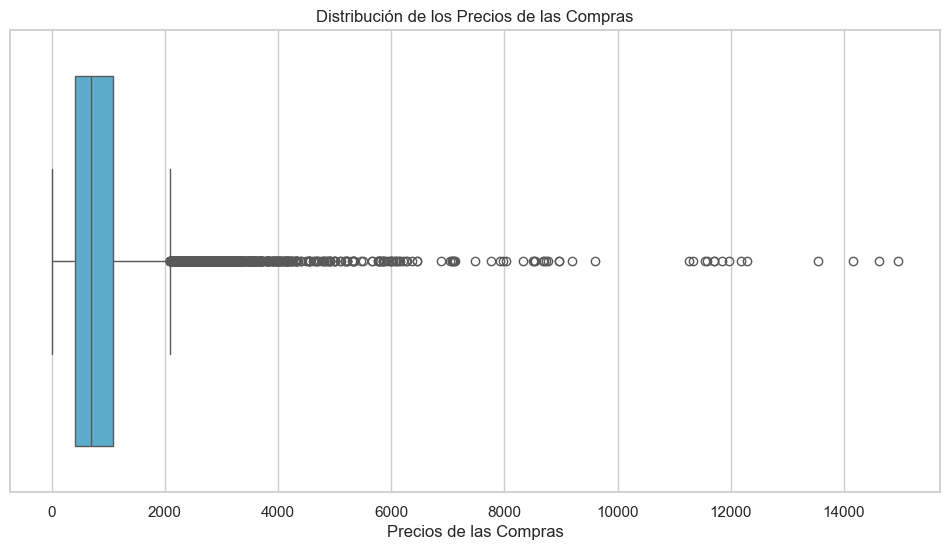

In [29]:
# Boxplot to show the distribution of prices
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=reservamos_purchase_complete_df['Price'], color="#49b4df")
plt.title('Distribución de los Precios de las Compras')
plt.xlabel('Precios de las Compras')
plt.show()


In [53]:
# Adding aditional information to the dataframe Hours
reservamos_purchase_complete_df['hour'] = reservamos_purchase_complete_df['time'].dt.hour
reservamos_purchase_complete_df['weekDay'] = reservamos_purchase_complete_df['time'].dt.day_name(locale='es_ES')


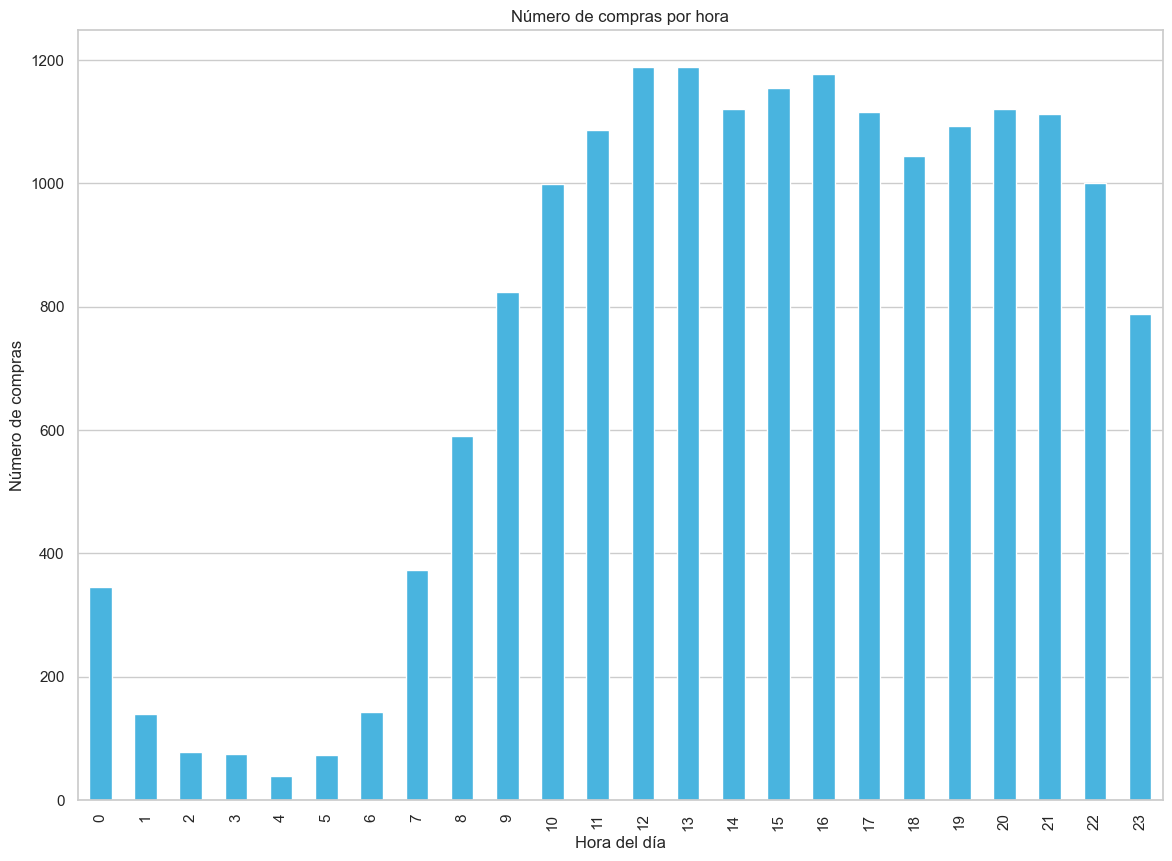

In [54]:
#plot the number of purchases per hour
purchases_per_hour = reservamos_purchase_complete_df['hour'].value_counts().sort_index()
plot_data_with_mplt(data=purchases_per_hour, title='Número de compras por hora', xlabel='Hora del día', ylabel='Número de compras', color='#49b4df', kind="bar")

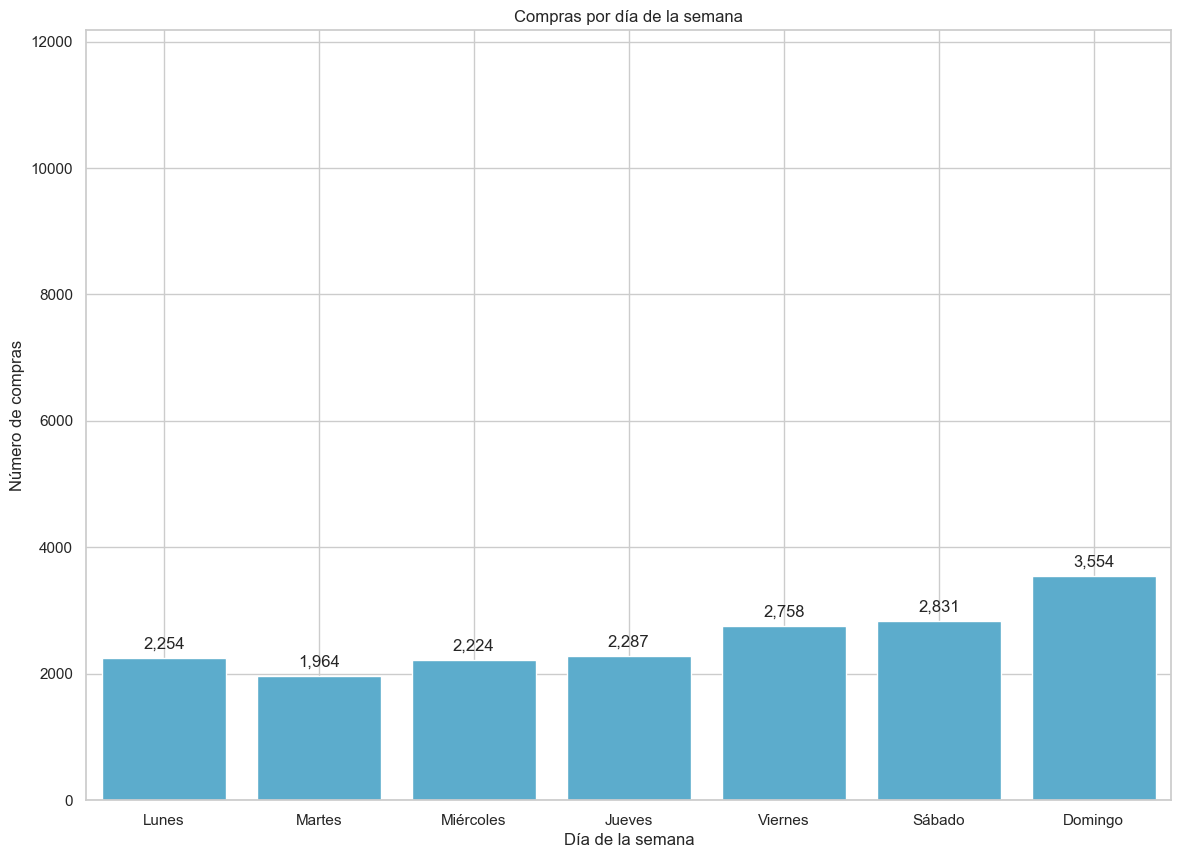

In [65]:

# purchases per weekday
purchases_weekday = reservamos_purchase_complete_df['weekDay'].value_counts().reindex([
    "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"
])

plot_data_with_sns(data=purchases_weekday, title='Compras por día de la semana', xlabel='Día de la semana', ylabel='Número de compras', color='#49b4df', show_amount=True)


(array([19875., 19879., 19883., 19887., 19891., 19895., 19899., 19903.,
        19905.]),
 [Text(19875.0, 0, '2024-06-01'),
  Text(19879.0, 0, '2024-06-05'),
  Text(19883.0, 0, '2024-06-09'),
  Text(19887.0, 0, '2024-06-13'),
  Text(19891.0, 0, '2024-06-17'),
  Text(19895.0, 0, '2024-06-21'),
  Text(19899.0, 0, '2024-06-25'),
  Text(19903.0, 0, '2024-06-29'),
  Text(19905.0, 0, '2024-07-01')])

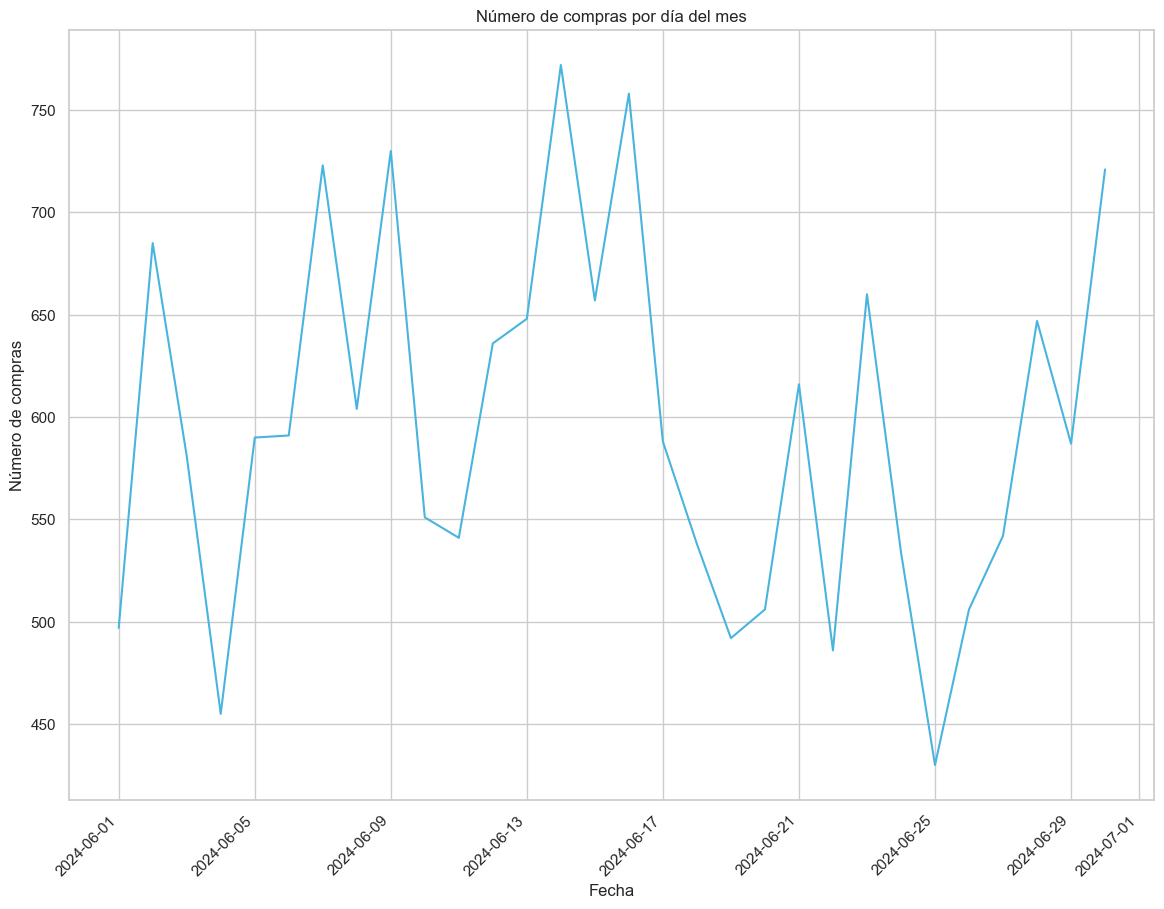

In [68]:
# purchases per day of the month
plt.figure(figsize=(14, 10))
plt.plot(reservamos_purchase_complete_df["time"].dt.date.value_counts().sort_index(), color='#49b4df')
plt.title('Número de compras por día del mes')
plt.xlabel('Fecha')
plt.ylabel('Número de compras')
plt.xticks(rotation=45, ha='right') 

(array([19875., 19879., 19883., 19887., 19891., 19895., 19899., 19903.,
        19905.]),
 [Text(19875.0, 0, '2024-06-01'),
  Text(19879.0, 0, '2024-06-05'),
  Text(19883.0, 0, '2024-06-09'),
  Text(19887.0, 0, '2024-06-13'),
  Text(19891.0, 0, '2024-06-17'),
  Text(19895.0, 0, '2024-06-21'),
  Text(19899.0, 0, '2024-06-25'),
  Text(19903.0, 0, '2024-06-29'),
  Text(19905.0, 0, '2024-07-01')])

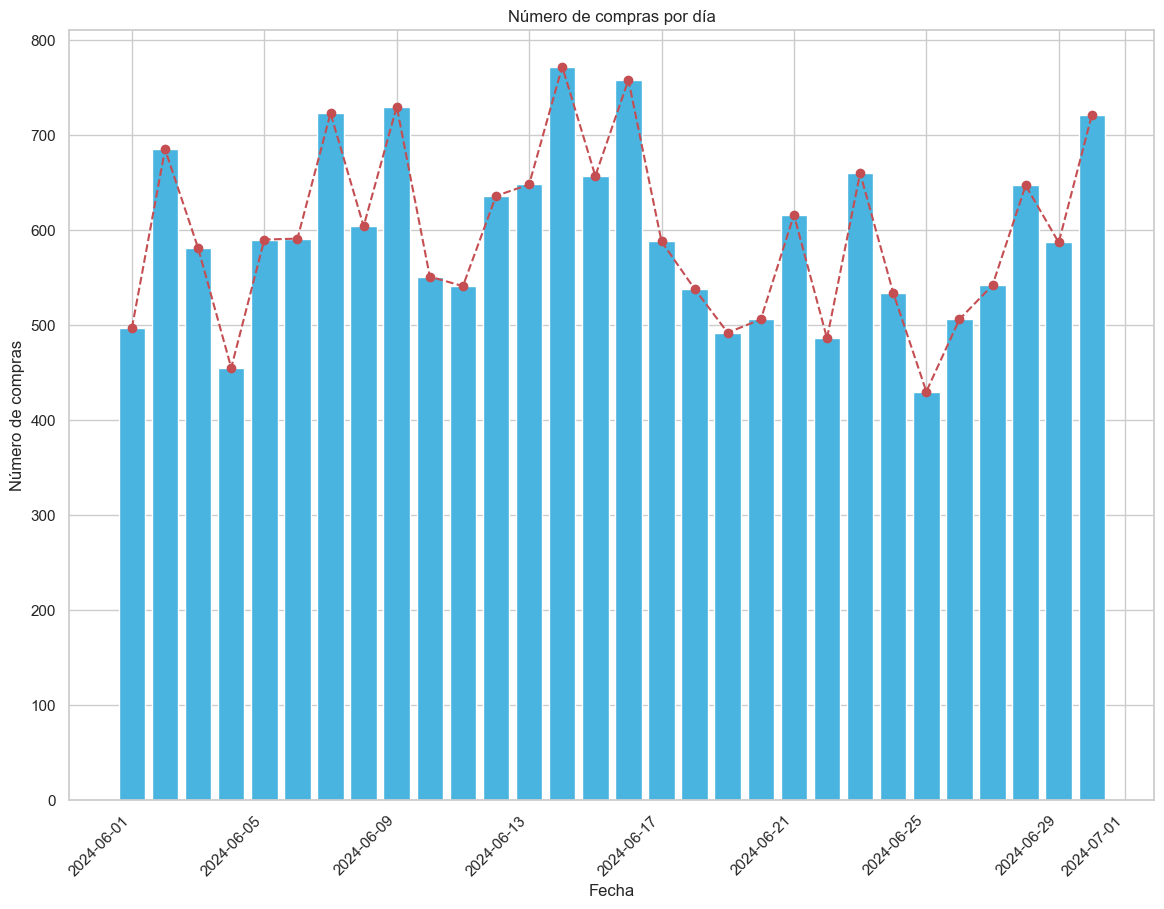

In [69]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.bar(reservamos_purchase_complete_df["time"].dt.date.value_counts().sort_index().index,reservamos_purchase_complete_df["time"].dt.date.value_counts().sort_index(), color="#49b4df")
ax.plot(reservamos_purchase_complete_df["time"].dt.date.value_counts().sort_index(), 'r--', marker='o', label='Línea Punteada')
plt.title('Número de compras por día')
plt.xlabel('Fecha')
plt.ylabel('Número de compras')
plt.xticks(rotation=45, ha='right') 

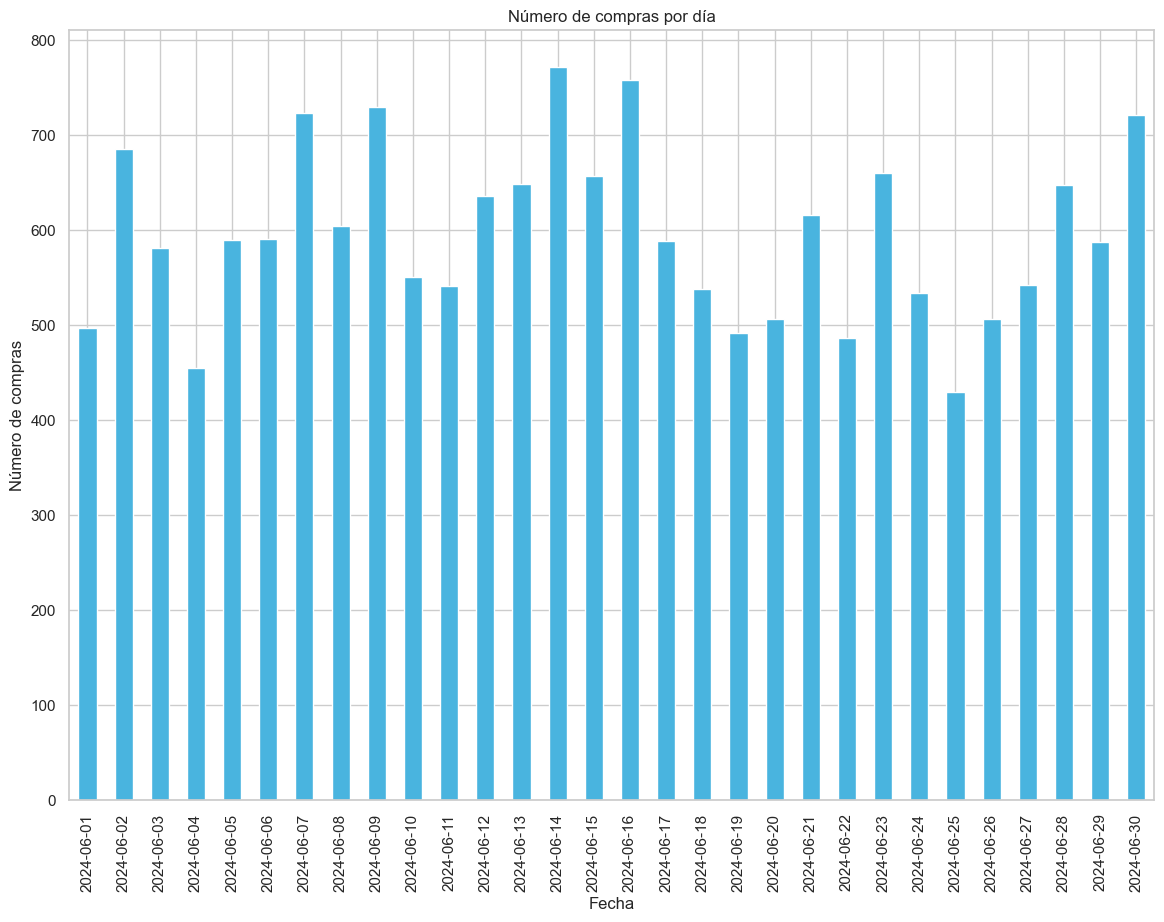

In [71]:

# purchases by day of the month
purchases_by_day = reservamos_purchase_complete_df["time"].dt.date.value_counts().sort_index()
plot_data_with_mplt(data=purchases_by_day, title='Número de compras por día', xlabel='Fecha', ylabel='Número de compras', color='#49b4df', kind="bar", show_amount=False, grid_axis='x')


/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_36028/3656524622.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_method_index, y=payment_method_values, palette=palette_colors[:4])
/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_36028/3656524622.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.barplot(x=payment_method_index, y=payment_method_values, palette=palette_colors[:4])


Text(0, 0.5, 'Número de compras')

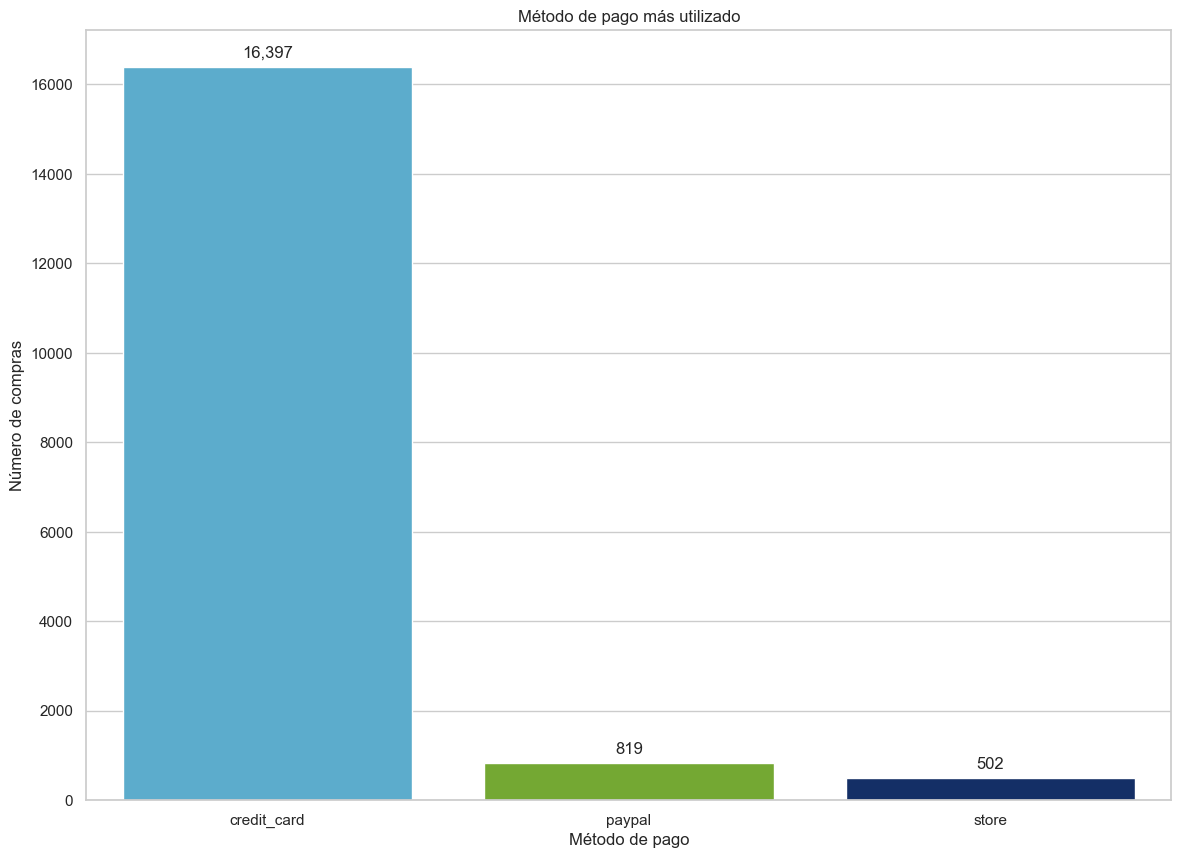

In [74]:
payment_method_index = reservamos_purchase_complete_df["Payment_Type"].value_counts().index
payment_method_values = reservamos_purchase_complete_df["Payment_Type"].value_counts().values

plt.figure(figsize=(14, 10))
ax = sns.barplot(x=payment_method_index, y=payment_method_values, palette=palette_colors[:4])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
    
plt.title('Método de pago más utilizado')
plt.xlabel('Método de pago')
plt.ylabel('Número de compras')

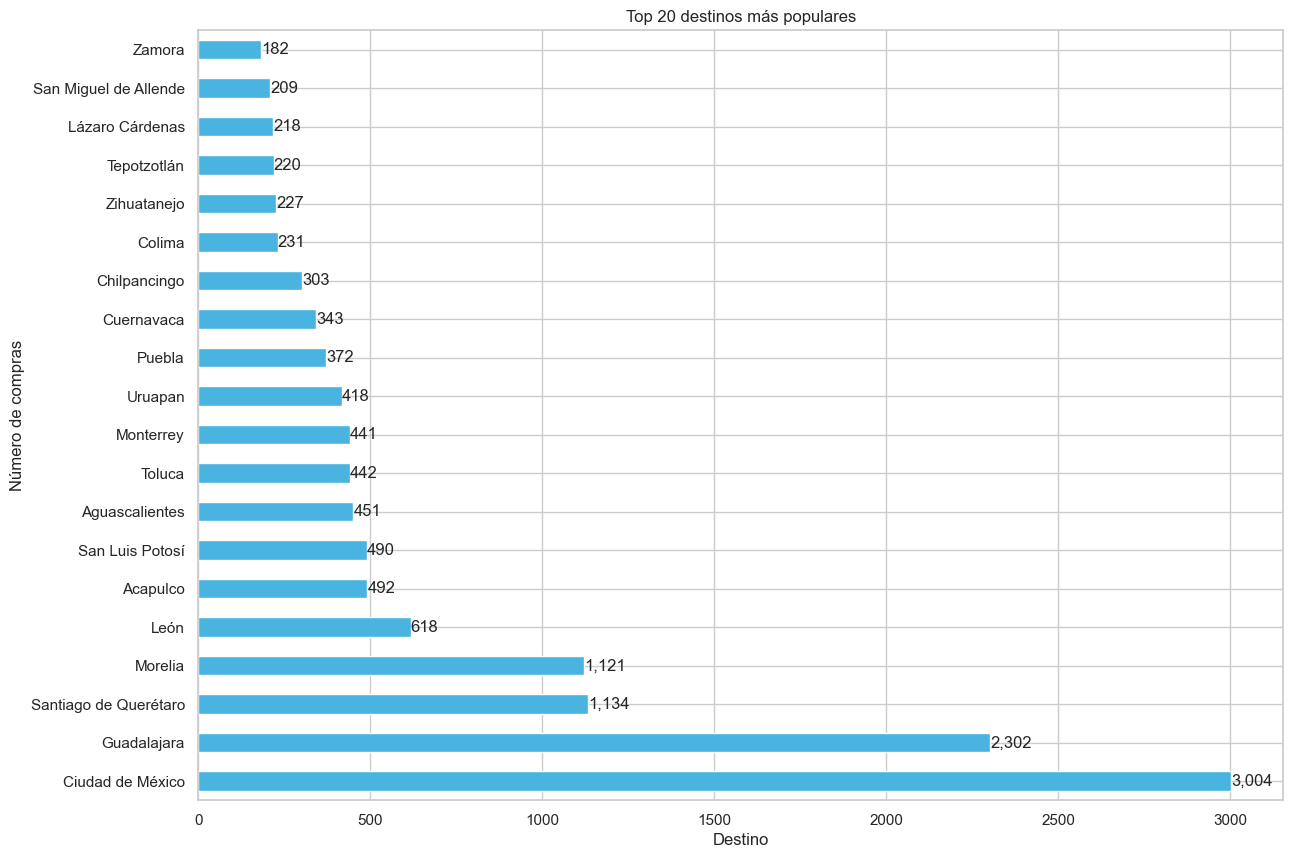

In [76]:
# Top 20 most popular destinations 
popular_destinations = reservamos_purchase_complete_df["Departure_Destination"].value_counts().head(20)

plot_data_with_mplt(data=popular_destinations, title='Top 20 destinos más populares', xlabel='Destino', ylabel='Número de compras', color='#49b4df', kind="barh", show_amount=True, grid_axis='y')




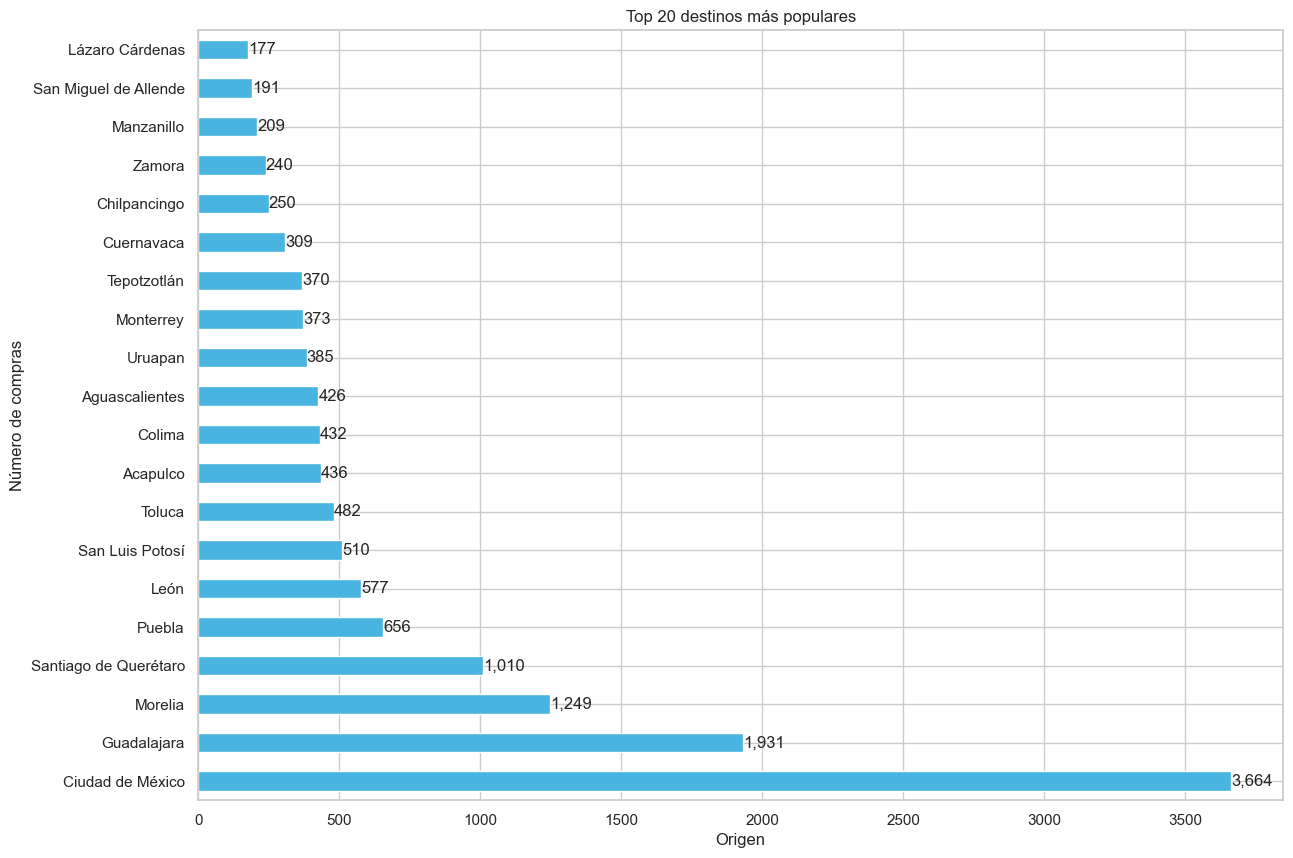

In [78]:
# Top 20 most popular origins
popular_origins = reservamos_purchase_complete_df["Departure_Origin"].value_counts().head(20)

plot_data_with_mplt(data=popular_origins, title='Top 20 destinos más populares', xlabel='Origen', ylabel='Número de compras', color='#49b4df', kind="barh", show_amount=True, grid_axis='y')



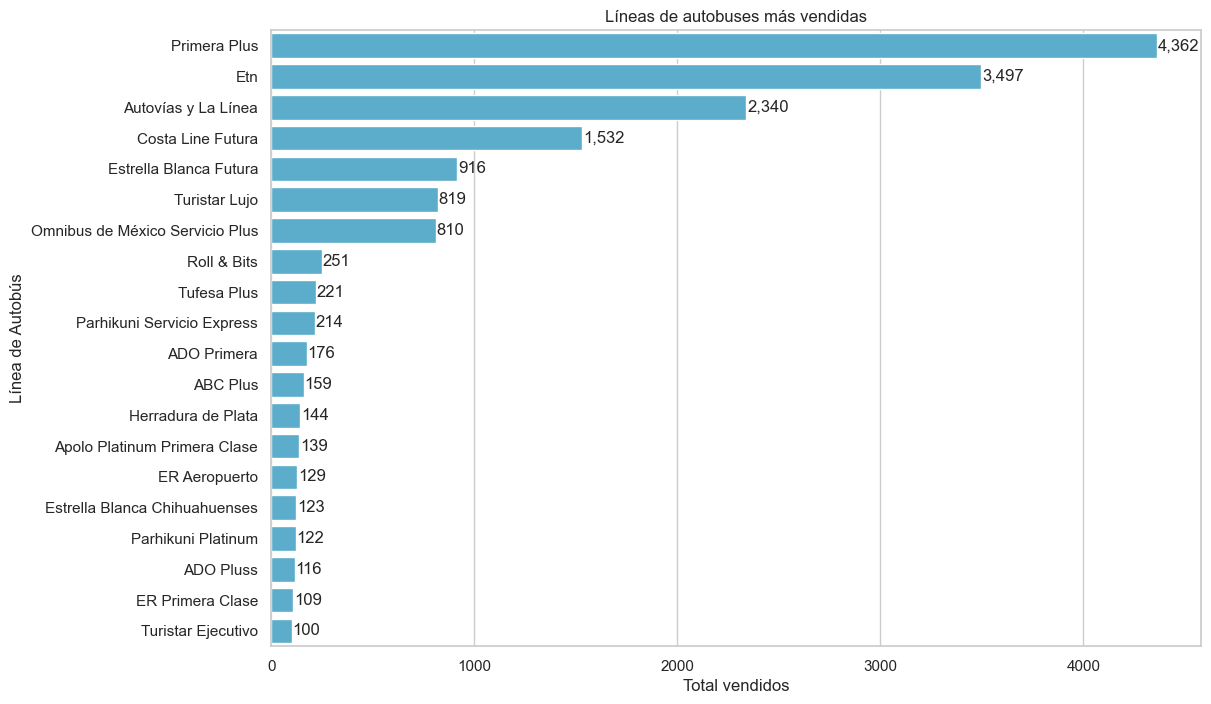

In [27]:
popular_lines = reservamos_purchase_complete_df["Departure_Line"].value_counts().head(20)


plt.figure(figsize=(12, 8))
ax = sns.barplot(y=popular_lines.index, x=popular_lines.values, color="#49b4df" , orient='h')
ax.set_title('Líneas de autobuses más vendidas')
ax.set_xlabel('Total vendidos')
ax.set_ylabel('Línea de Autobús')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3,  
             p.get_y() + p.get_height() / 2, 
             f'{int(width):,}', 
             va='center')

plt.show()

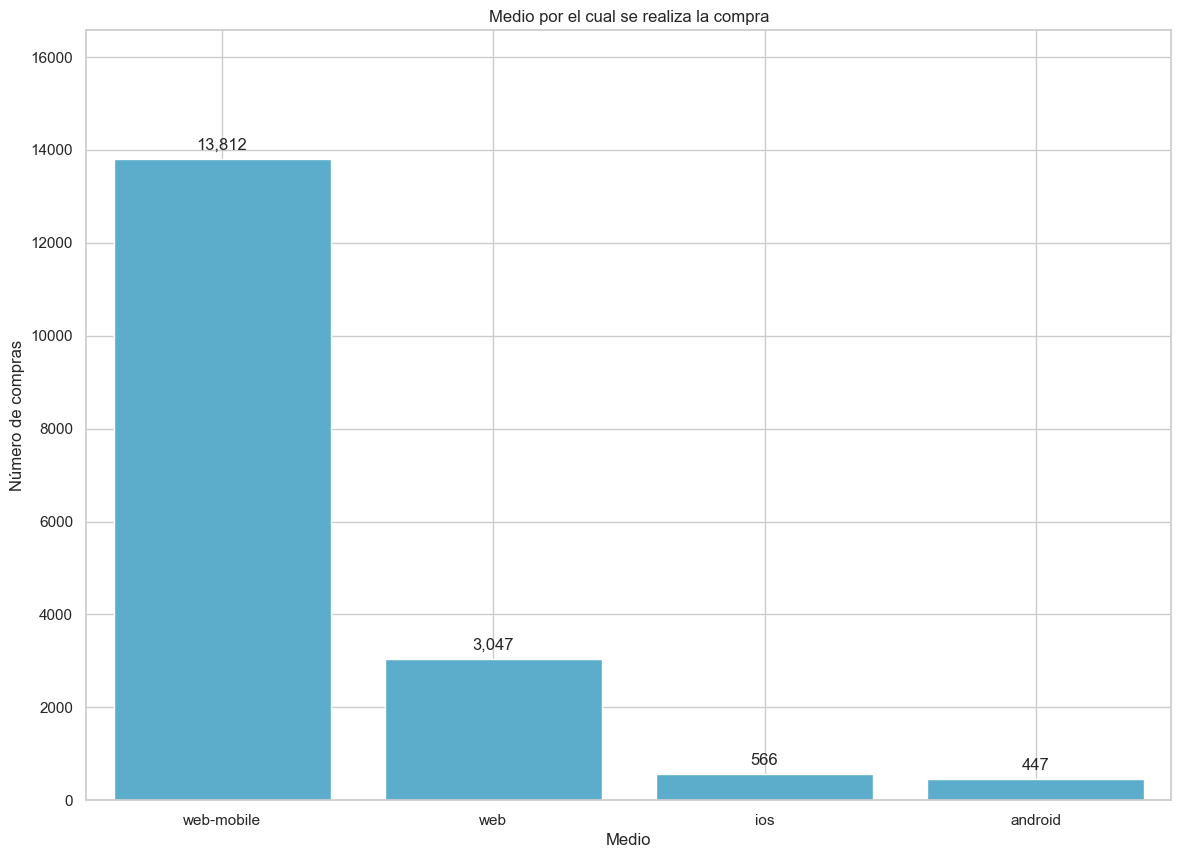

In [86]:
product = reservamos_purchase_complete_df["product"].value_counts().head(20)

plot_data_with_sns(data=product, title='Medio por el cual se realiza la compra', xlabel='Medio', ylabel='Número de compras', color='#49b4df', show_amount=True)





In [88]:
# adding "YYYY-MM-DD" column to the dataframes to merge them
reservamos_purchase_attemp_df["time"] = pd.to_datetime(reservamos_purchase_attemp_df["time"], unit='s')
reservamos_purchase_attemp_df["datetime"] = reservamos_purchase_attemp_df["time"].dt.date
reservamos_purchase_complete_df["datetime"] = reservamos_purchase_complete_df["time"].dt.date

In [108]:
# Drop duplicates to avoid duplicates in the merge, also to only have the first attempt in day by user
reservamos_purchase_attemp_df_without_duplicates = reservamos_purchase_attemp_df.drop_duplicates(subset=["User_Fingerprint", "datetime"], keep="first")
# Merge the dataframes to get the time until complete the purchase
uninio_df = reservamos_purchase_complete_df.merge(reservamos_purchase_attemp_df_without_duplicates, on=["User_Fingerprint", "datetime"], how="inner", suffixes=('_complete', '_attempt'))
uninio_df["time_until_complete"] = (uninio_df["time_complete"] - uninio_df["time_attempt"]).dt.total_seconds() /60
uninio_df = uninio_df[~uninio_df["User_Fingerprint"].isna()]
uninio_df = uninio_df [uninio_df["time_until_complete"] > 0]


bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-5 minutos', '5-10 minutos', '10-15 minutos', '15-20 minutos', '20-30 minutos', '30-40 minutos', '40-50 minutos', '50-60 minutos', "60+"]


uninio_df['time_category'] = pd.cut(uninio_df['time_until_complete'], bins=bins, labels=labels, right=False)
time_distribution = uninio_df['time_category'].value_counts().sort_index()




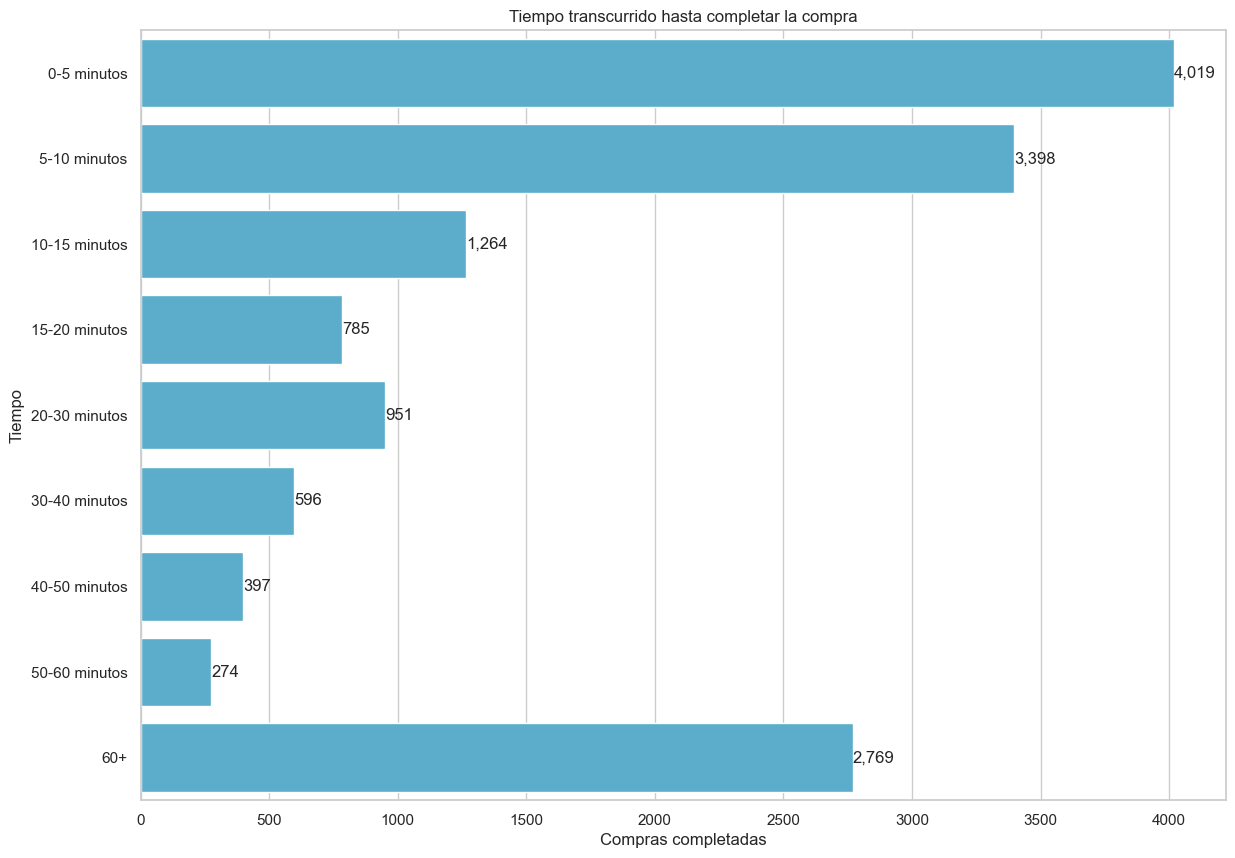

In [112]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=time_distribution.values, y=time_distribution.index, color="#49b4df")

ax.set_title('Tiempo transcurrido hasta completar la compra')
ax.set_xlabel('Compras completadas')
ax.set_ylabel('Tiempo')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, 
             p.get_y() + p.get_height() / 2,  
             f'{int(width):,}', 
             va='center')

plt.show()

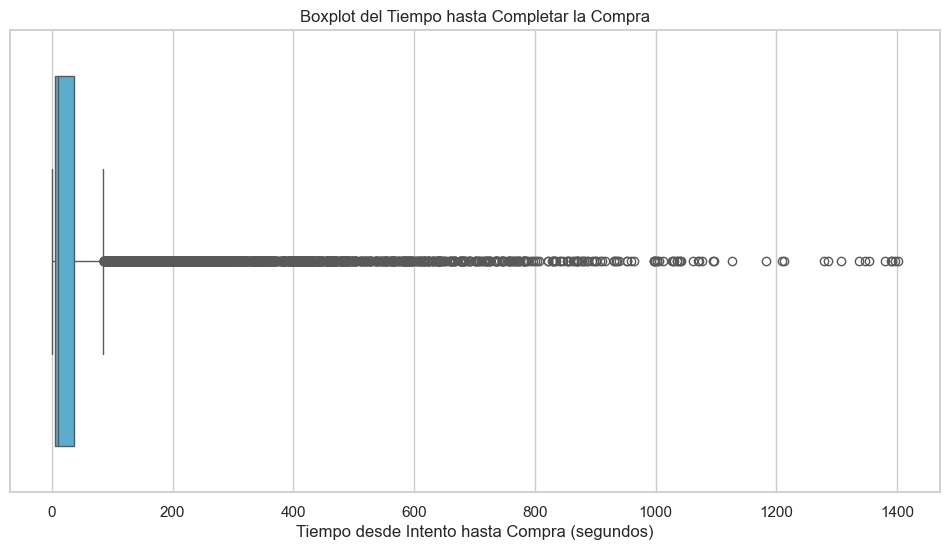

In [110]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=uninio_df['time_until_complete'], color="#49b4df")
plt.title('Boxplot del Tiempo hasta Completar la Compra')
plt.xlabel('Tiempo desde Intento hasta Compra (segundos)')
plt.show()


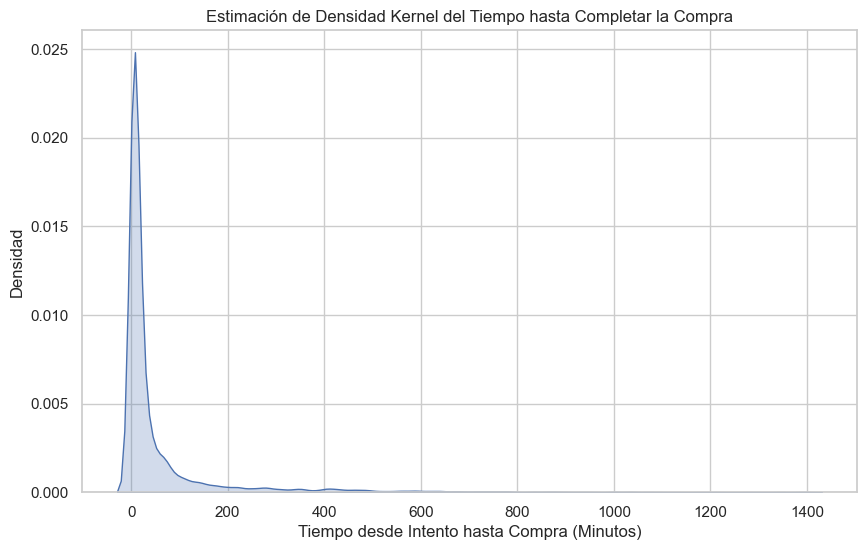

In [111]:
plt.figure(figsize=(10, 6))
sns.kdeplot(uninio_df['time_until_complete'], bw_adjust=0.5, fill=True)
plt.title('Estimación de Densidad Kernel del Tiempo hasta Completar la Compra')
plt.xlabel('Tiempo desde Intento hasta Compra (Minutos)')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


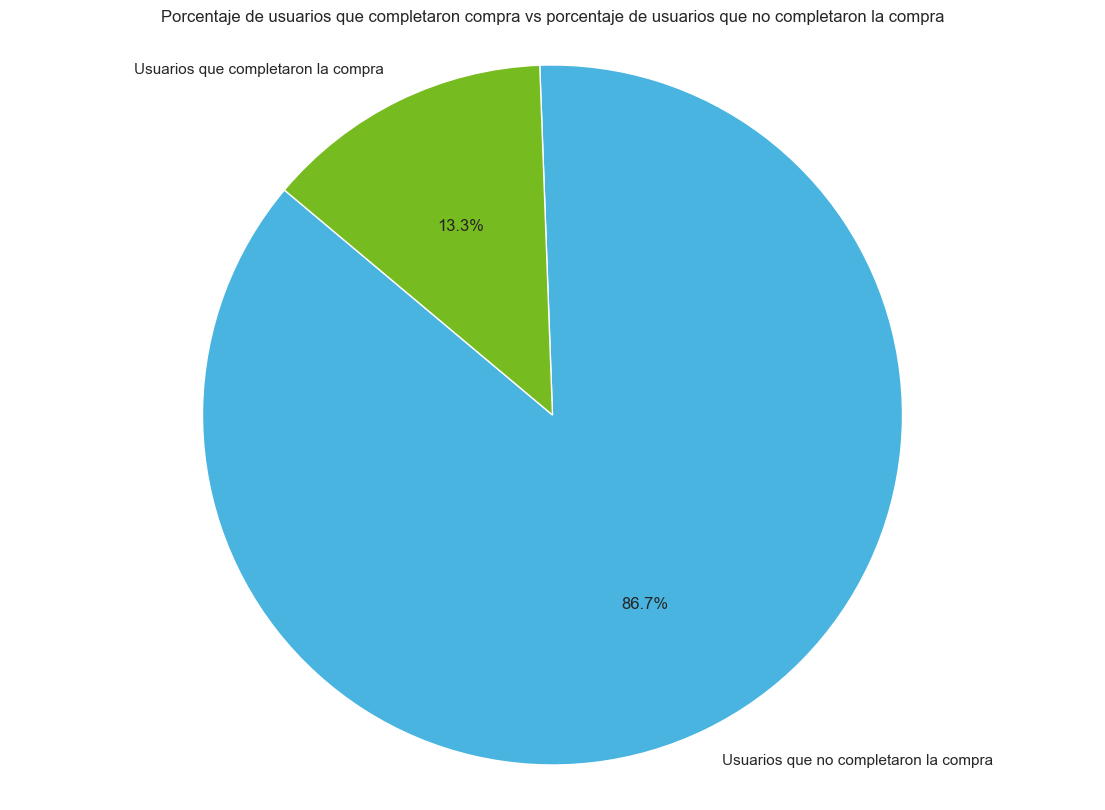

In [113]:
# User that try to purchase but don't complete the purchase
# Drop duplicates to avoid duplicates in the merge, also to only have the first attempt in day by user
reservamos_purchase_attemp_df_without_duplicates = reservamos_purchase_attemp_df.drop_duplicates(subset=["User_Fingerprint", "datetime"], keep="first")

# Merge dataframes to exclude users that complete the purchase
merge_df = reservamos_purchase_attemp_df_without_duplicates.merge(reservamos_purchase_complete_df, on=["User_Fingerprint", "datetime"], how='left', indicator=True)

#Filter user who don't complete the purchase 
users_not_completing_purchase = merge_df[merge_df['_merge'] == 'left_only']

#results
user_not_complete_purchase = users_not_completing_purchase.shape[0]
user_complete_purchase = reservamos_purchase_complete_df.shape[0]

plt.figure(figsize=(14, 10))
plt.pie([user_not_complete_purchase, user_complete_purchase], labels=['Usuarios que no completaron la compra', 'Usuarios que completaron la compra'], autopct='%1.1f%%', startangle=140, colors=palette_colors) 
plt.title('Porcentaje de usuarios que completaron compra vs porcentaje de usuarios que no completaron la compra')
plt.axis('equal')
plt.show()